In [30]:
using LinearAlgebra
using ITensors, ITensorMPS
using Plots

In [126]:
include("../src/states.jl")

include("../src/circuits.jl")
include("../src/defs.jl")
include("../src/dynamics.jl")
include("../src/observables.jl")
include("../src/measurements.jl")

forced_measure_with_val (generic function with 2 methods)

In [44]:
ITensors.set_warn_order(24)

22

In [367]:
L = 100
T = 1
γ = 0.1
λ = 0.0
ψ0 = diagonal_neelstate(L)

ψ, data, terminal_data = circuit(ψ0, L, T, γ, λ; observables=Symbol[:exact_CMI_corr], PBC=false, cutoff=1E-8, maxdim=200, r=r);

In [368]:
data

Dict{Symbol, Vector} with 1 entry:
  :exact_CMI_corr => [0.0, 0.0, 0.0714112, 0.0]

In [369]:
ρ = reduced(ψ, 50, 52)

8-element Vector{ComplexF64}:
  0.006793054502871515 + 0.0im
   0.07562693398821962 + 0.0im
  0.013586109005743027 + 0.0im
   0.06883387948534804 + 0.0im
    0.0627178751021558 + 0.0im
    0.6900221594245826 + 0.0im
    0.0817429383714119 + 0.0im
 0.0006770501196791918 + 0.0im

In [366]:
vector_CMI(ρ, 2)

0.0714112323949565 + 0.0im

In [ ]:
# full_data = Dict{Tuple{Int,Int,Float64,Float64,Int},Dict}()

Dict{Tuple{Int64, Int64, Float64, Float64, Int64}, Dict}()

In [ ]:
using JLD2

# jldsave("../data/25_09_23.jld2"; full_data)

In [ ]:
# for L in [21,41,61]
#     for r in 2:2:10
#         T = 10L
#         γ = 0.1
#         λ = 0.0

#         ψ0 = diagonal_neelstate(L)

#         ψ, data, terminal_data = circuit(ψ0, L, T, γ, λ; observables=Symbol[:exact_CMI_corr], PBC=false, cutoff=1E-8, maxdim=200, r=r);
#         full_data[(L,T,γ,λ,r)] = data
#     end
# end

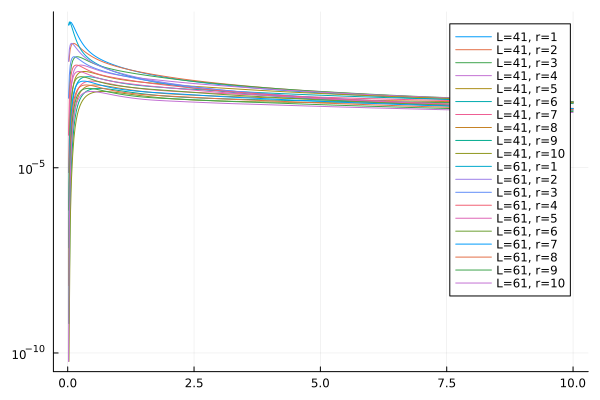

In [321]:
plt = plot()
for L in [41,61]
    T = 10L
    for r in 1:10
        xs = collect(0:T)/L
        ys = full_data[(L,T,γ,λ,r)][:exact_CMI_corr][1:2:end]
        plt = plot!(plt, xs[2:end], ys[2:end], label="L=$L, r=$r", yscale=:log10)
    end
end

plt

In [176]:
using DataFrames, GLM

function linear_fit_coef(x, y)
    # Ensure same length
    @assert length(x) == length(y) "x and y must have same length"
    
    # Fit linear model
    df = DataFrame(X=x, Y=y)
    ols = lm(@formula(Y ~ X), df)
    
    # Get coefficients (intercept and slope)
    b, m = coef(ols)
    
    return m, b
end


linear_fit_coef (generic function with 1 method)

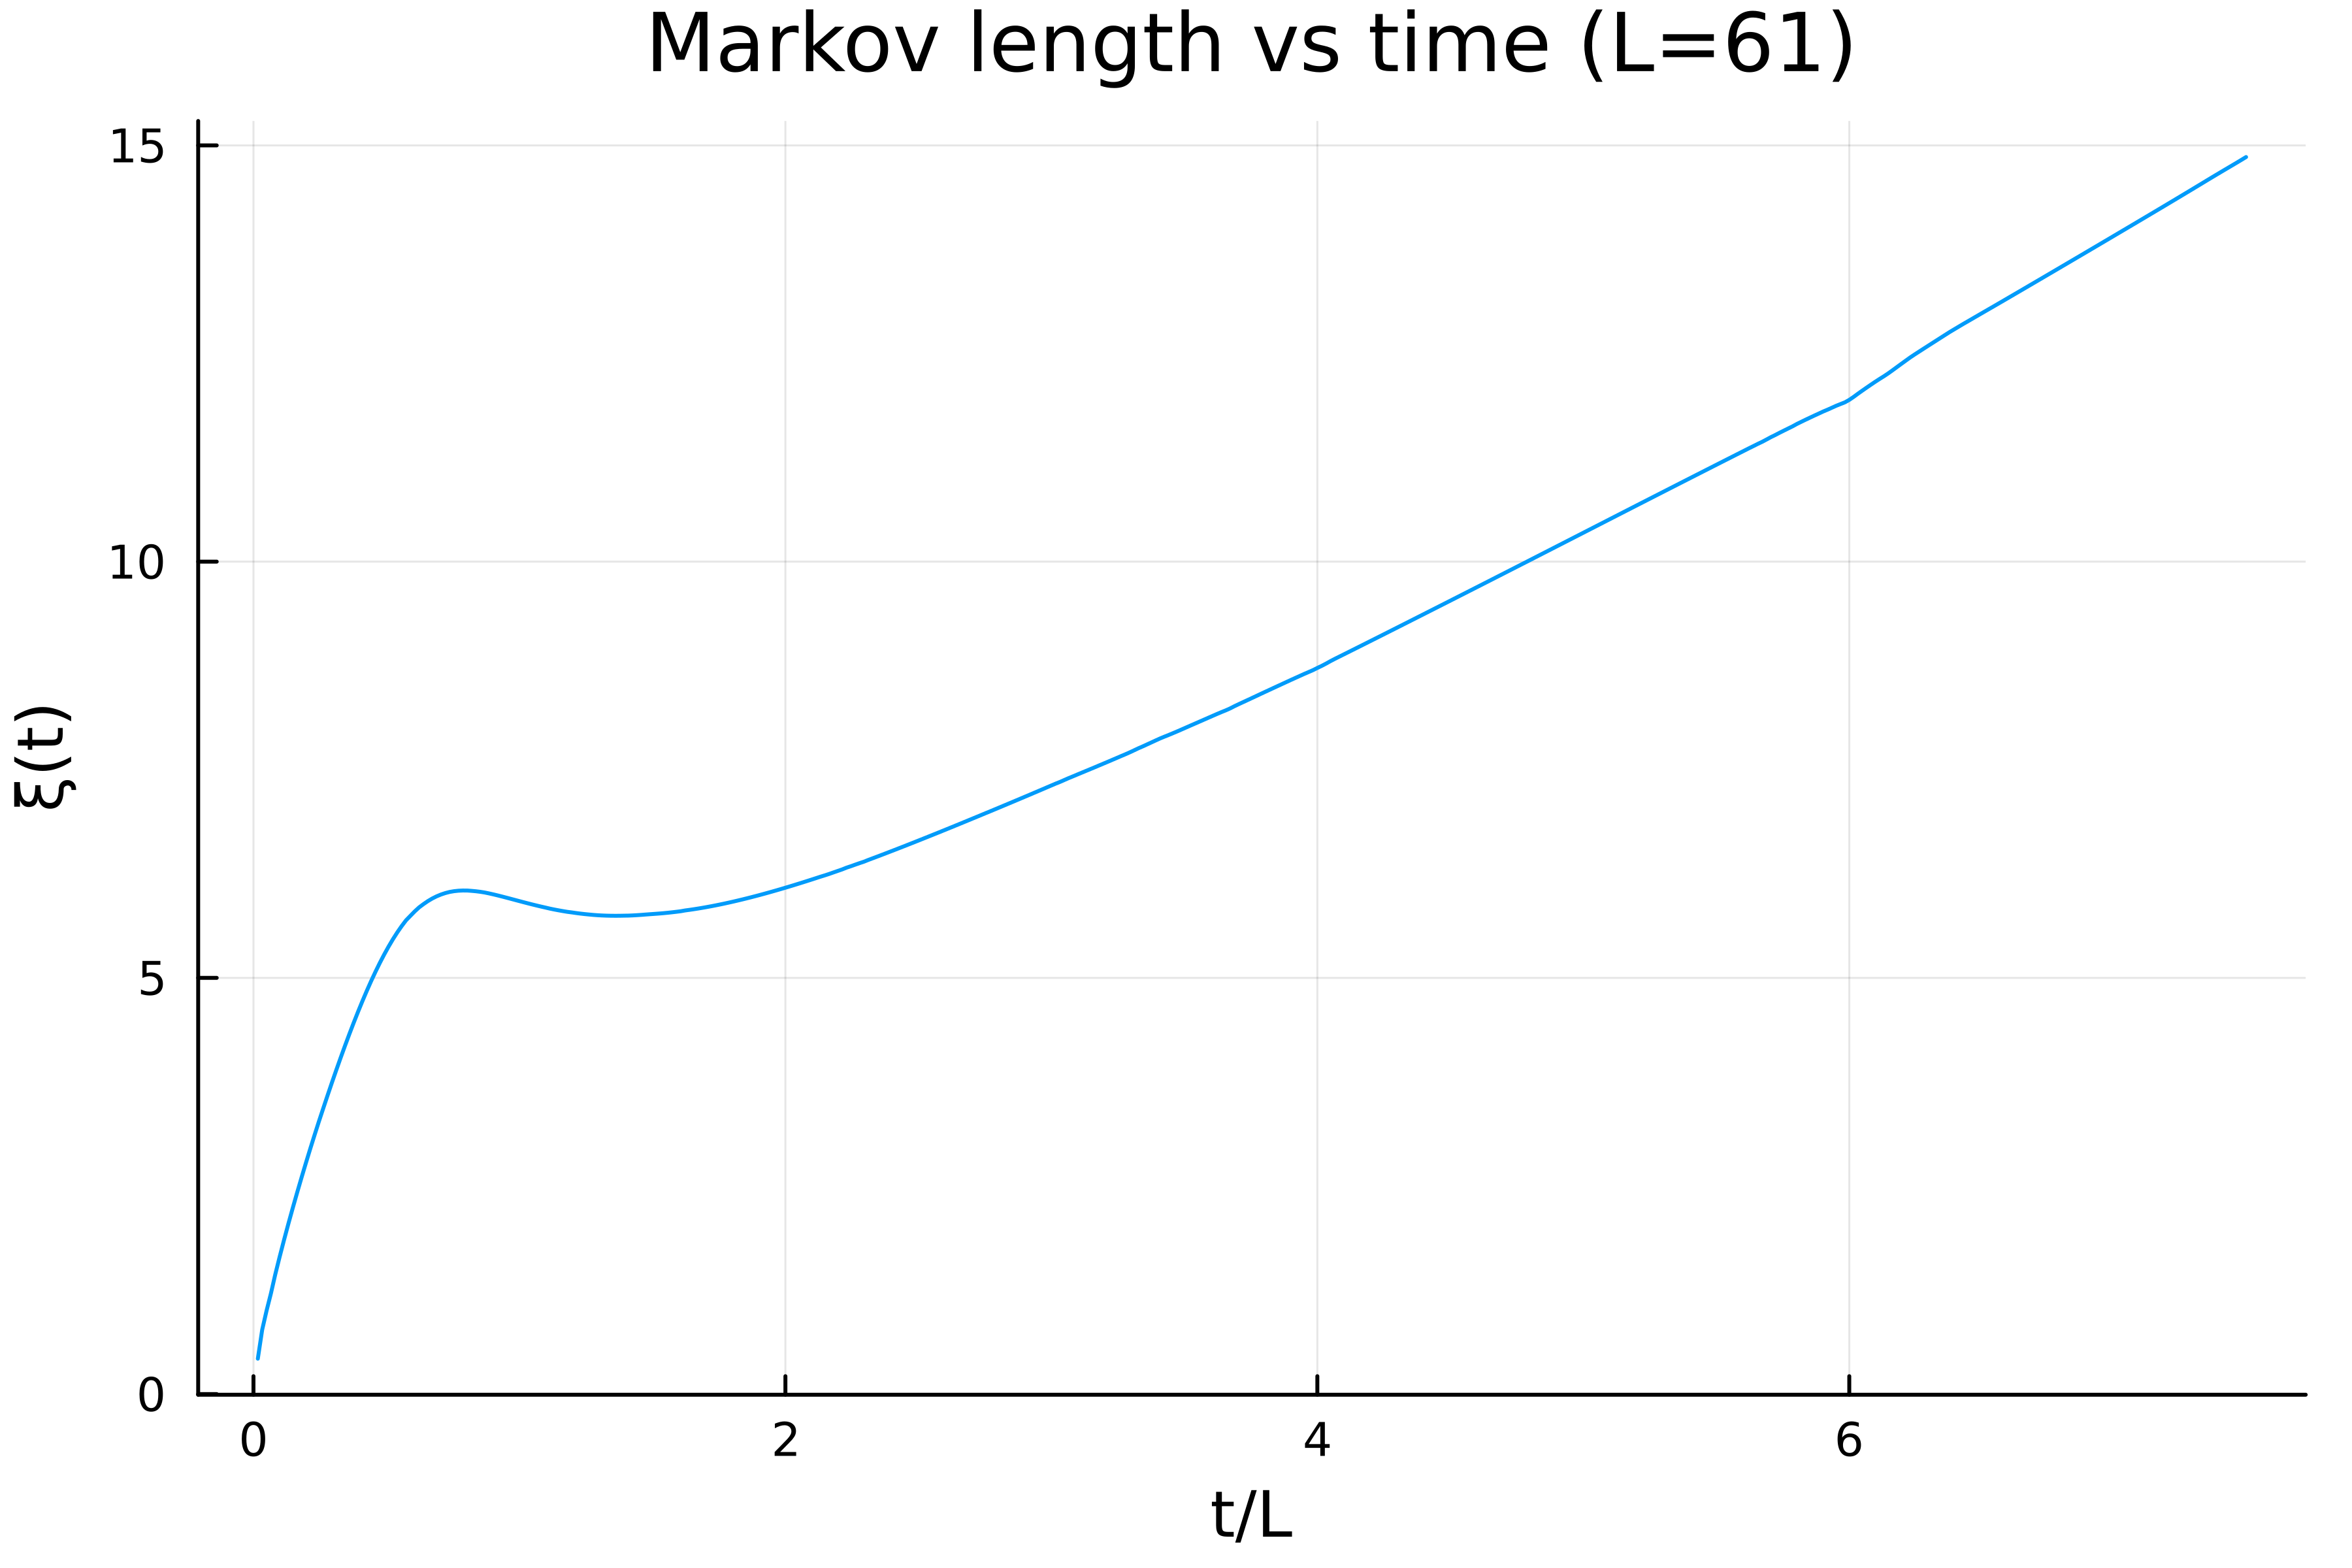

In [384]:
plt = plot()
rs = 5:10
for L in [61]
    T = 10L
    xs = collect(0:T)/L
    ys = -1 ./ [linear_fit_coef(rs, log.([full_data[(L,T,γ,λ,r)][:exact_CMI_corr][t] for r in rs]))[1] for t in 1:2:2T+2]
    plt = plot!(plt, xs[2:3end÷4], ys[2:3end÷4], label="")
end
plot!(plt, xlabel="t/L", ylabel="ξ(t)", title="Markov length vs time (L=61)", dpi=600)

savefig(plt, "../figs/25_09_24/Markov_length_over_time.png")

plt

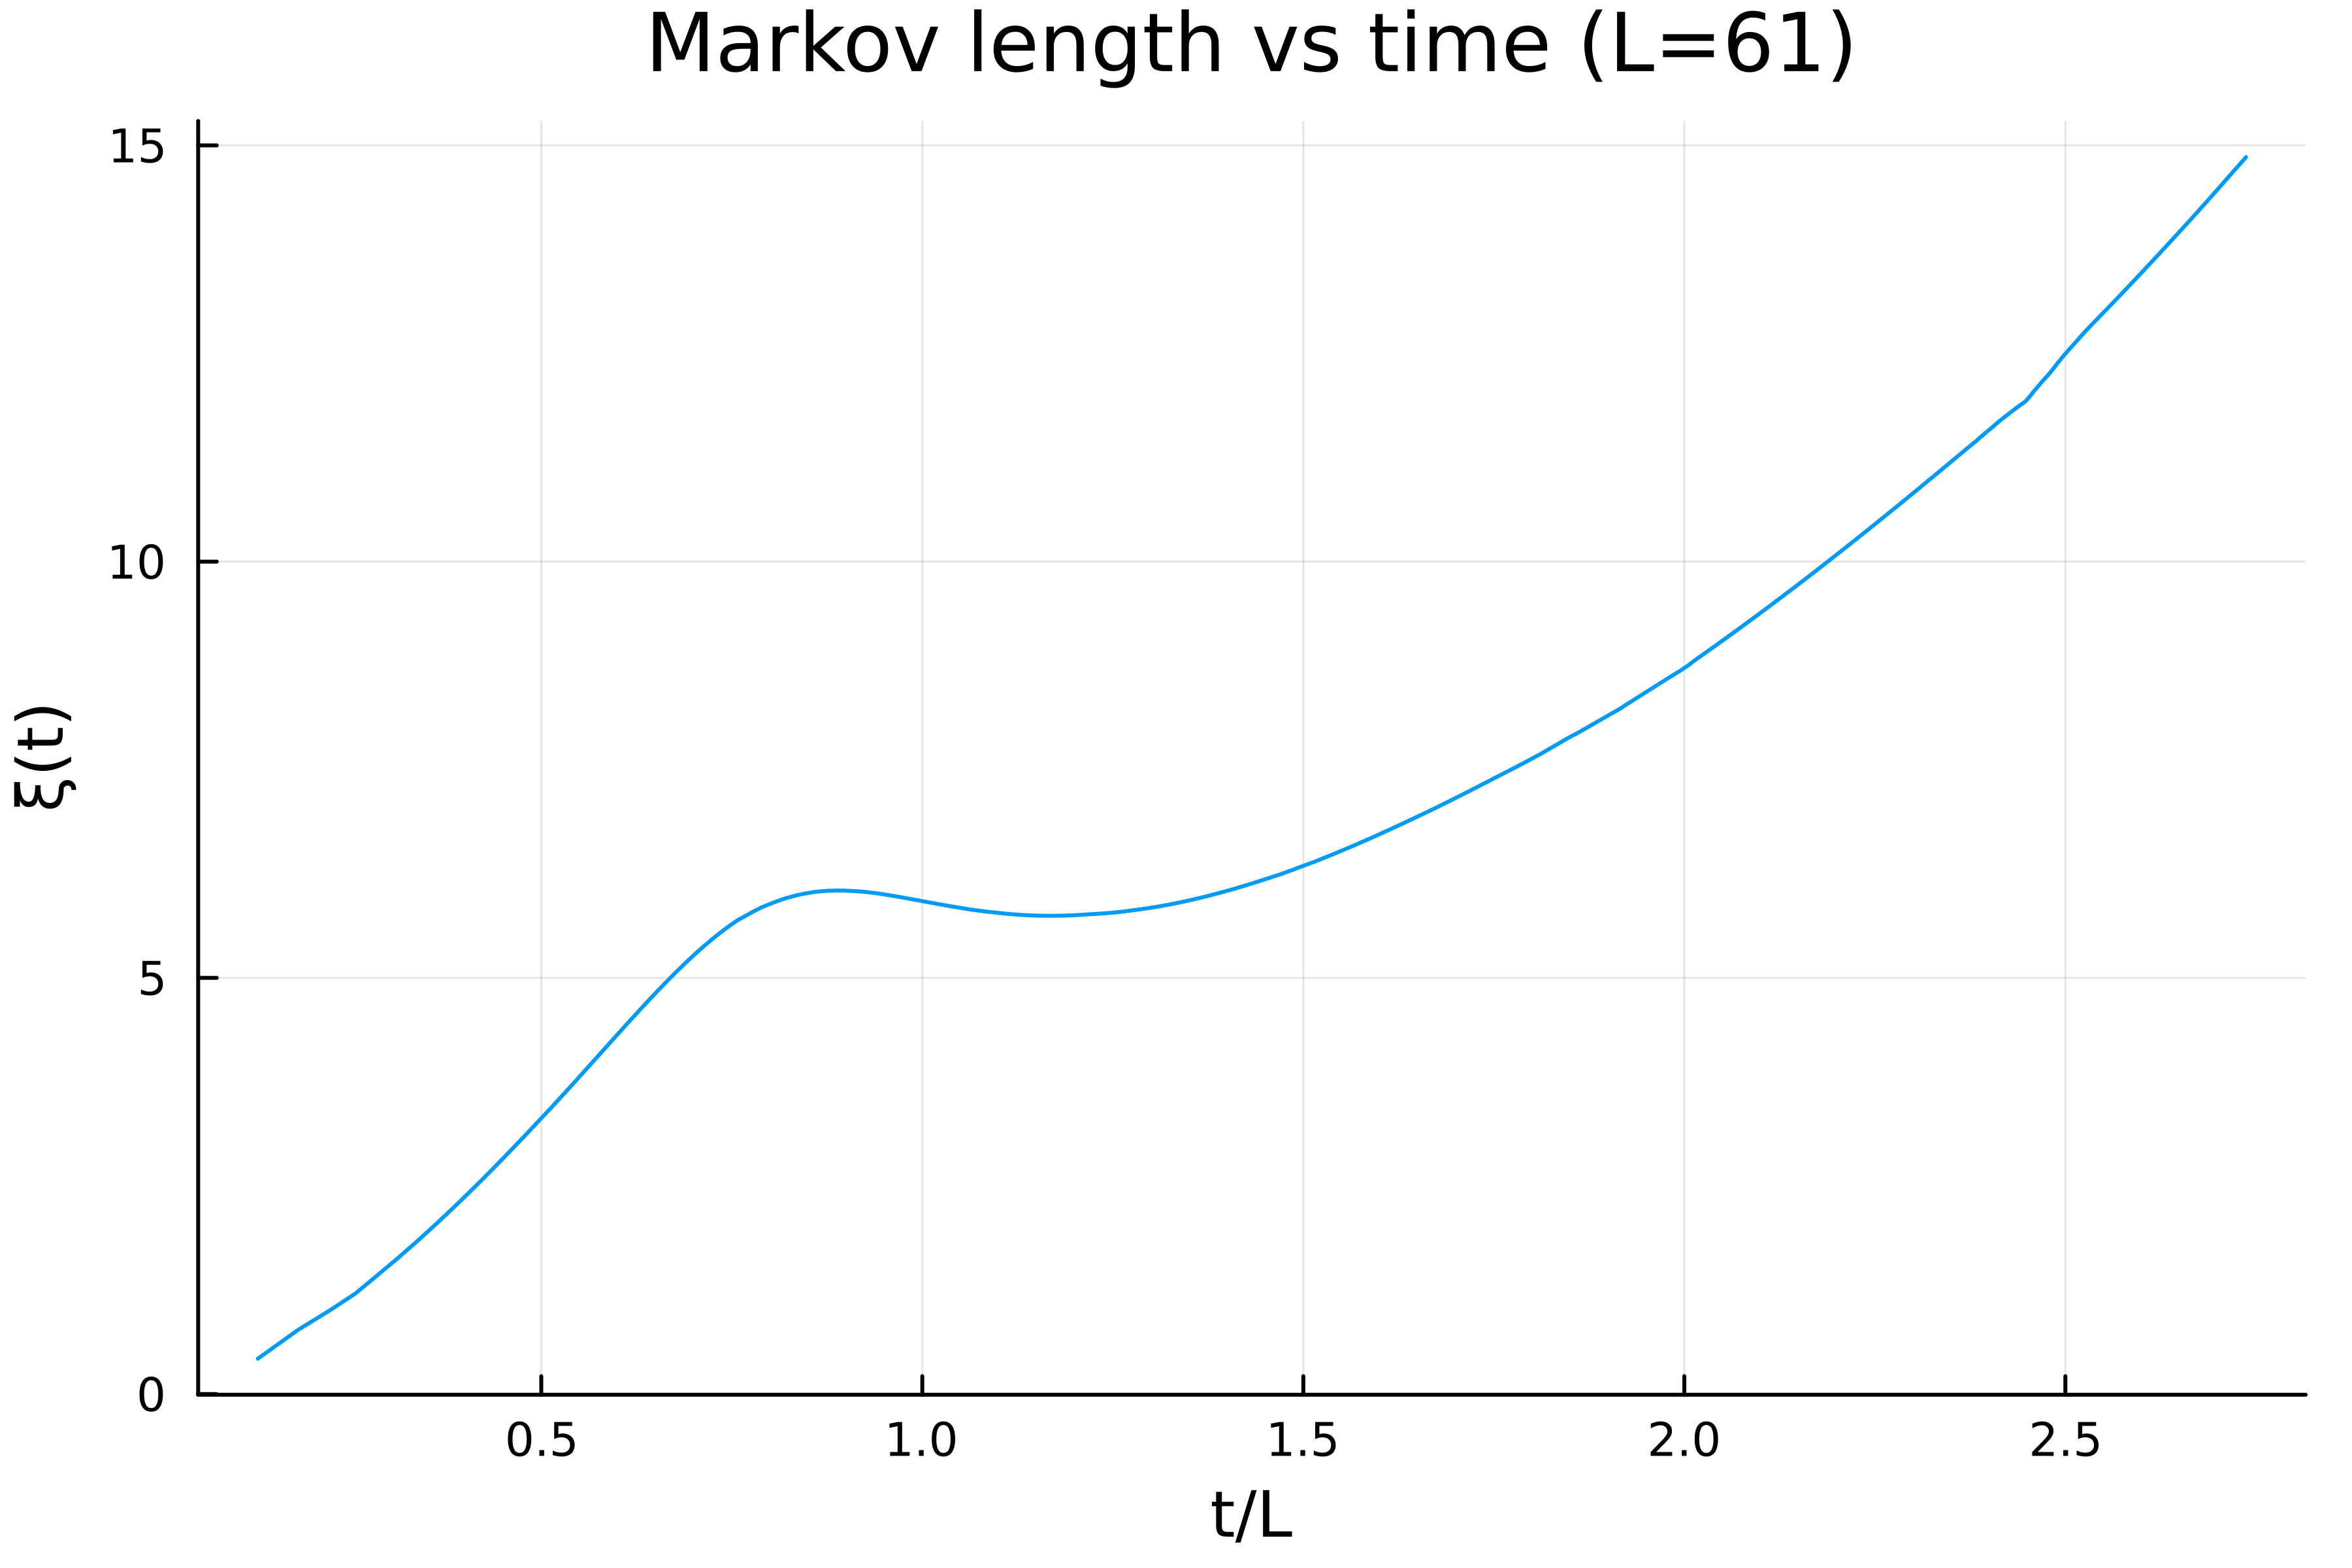

In [385]:
plt = plot()
rs = 5:10
for L in [61]
    T = 10L
    xs = collect(0:T)/L
    ys = -1 ./ [linear_fit_coef(rs, log.([full_data[(L,T,γ,λ,r)][:exact_CMI_corr][t] for r in rs]))[1] for t in 1:2:2T+2]
    plt = plot!(plt, sqrt.(xs[2:3end÷4]), ys[2:3end÷4], label="")
end
plot!(plt, xlabel="t/L", ylabel="ξ(t)", title="Markov length vs time (L=61)", dpi=600)

savefig(plt, "../figs/25_09_24/Markov_length_over_root_time.png")

plt

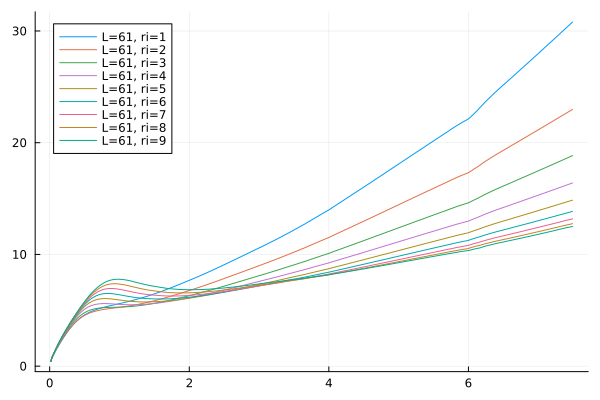

In [304]:
plt = plot()
L = 61
# rs = 6:10
for ri in 1:9
    rs = ri:10
    T = 10L
    xs = collect(0:T)/L
    ys = -1 ./ [linear_fit_coef(rs, log.([full_data[(L,T,γ,λ,r)][:exact_CMI_corr][t] for r in rs]))[1] for t in 1:2:2T+2]
    plt = plot!(plt, xs[2:3end÷4], ys[2:3end÷4], label="L=$L, ri=$ri")
end

plt

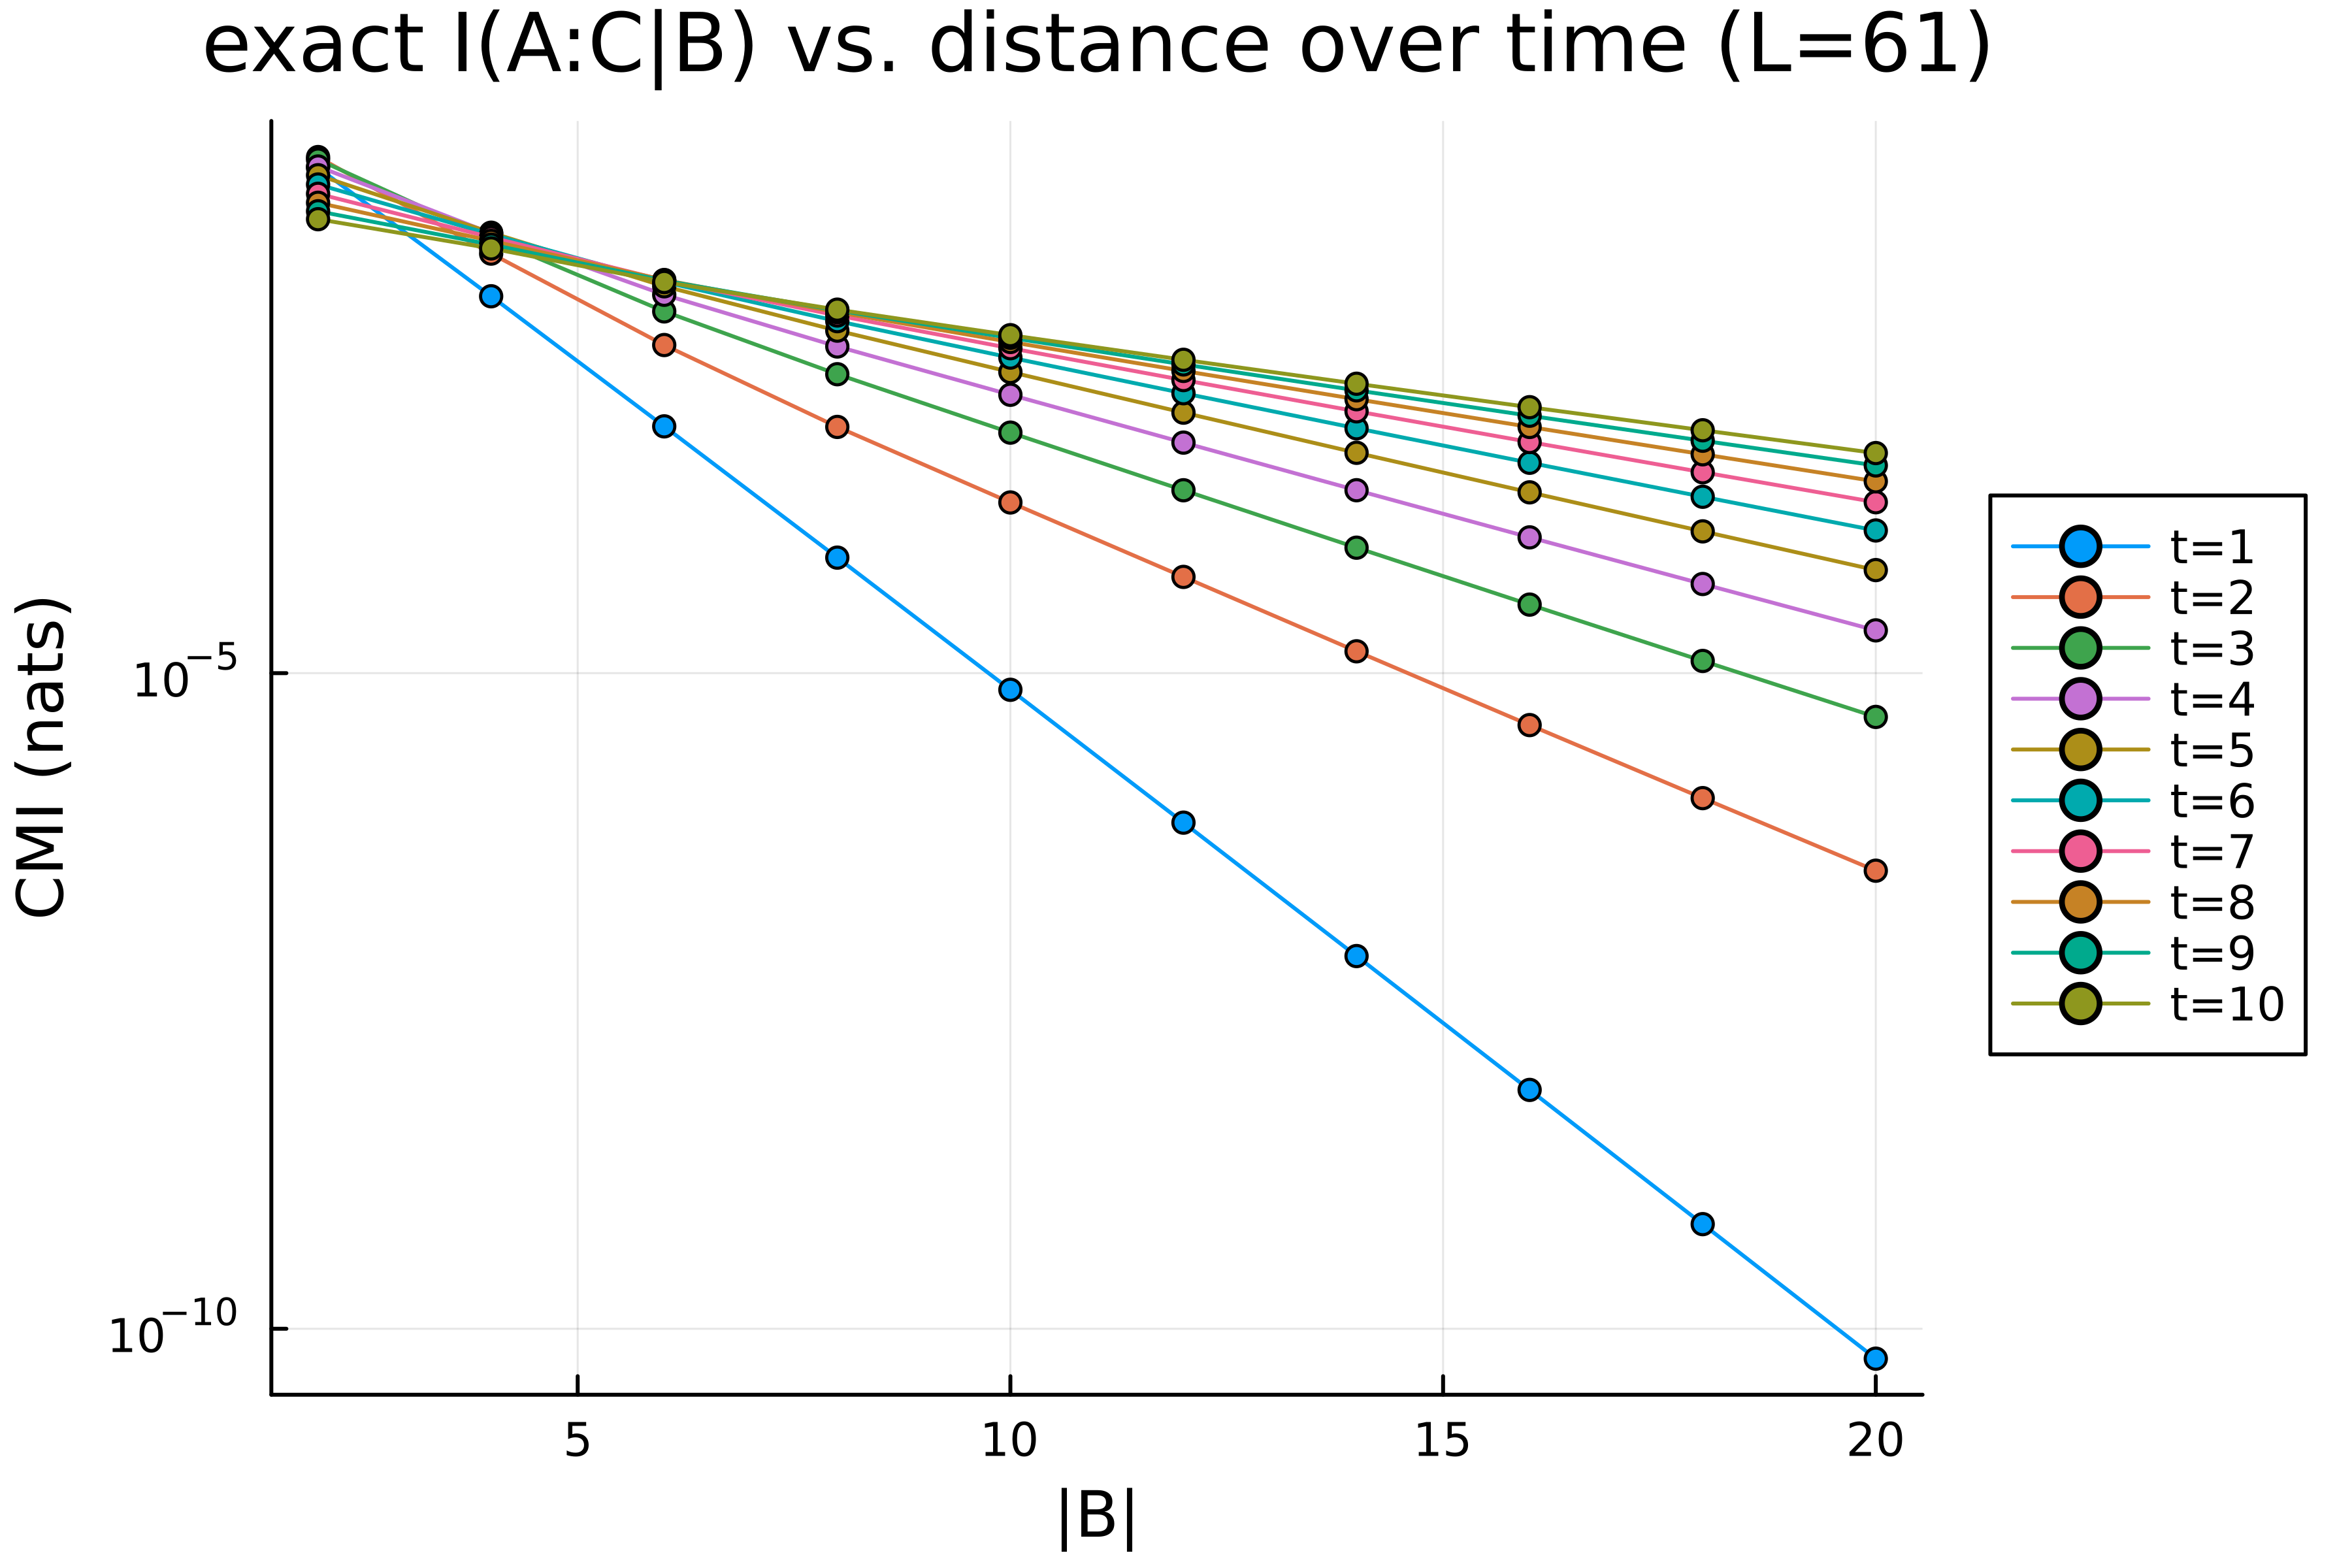

In [375]:
plt = plot()
L = 61
T = 10L
rs = 1:10

for t in 1:10
    xs = rs
    ys = [full_data[(L,T,γ,λ,r)][:exact_CMI_corr][1+2t] for r in rs]

    plt = plot!(plt, 2xs, ys, label="t=$t", m=3, yscale=:log10, legend=:outerright)
end

plot!(plt, xlabel="|B|", ylabel="CMI (nats)", title="exact I(A:C|B) vs. distance over time (L=61)", dpi=600)

savefig(plt, "../figs/25_09_24/CMI_early_times.png")

plt


# for t in 0.5:0.5:10.0
#     xs = rs
#     ys = [full_data[(L,T,γ,λ,r)][:exact_CMI_corr][1+2Int(round(t*L))] for r in rs]

#     plt = plot!(plt, 2xs, ys, label="t/L=$t", m=3, yscale=:log10, legend=:outerright)
# end
# plt

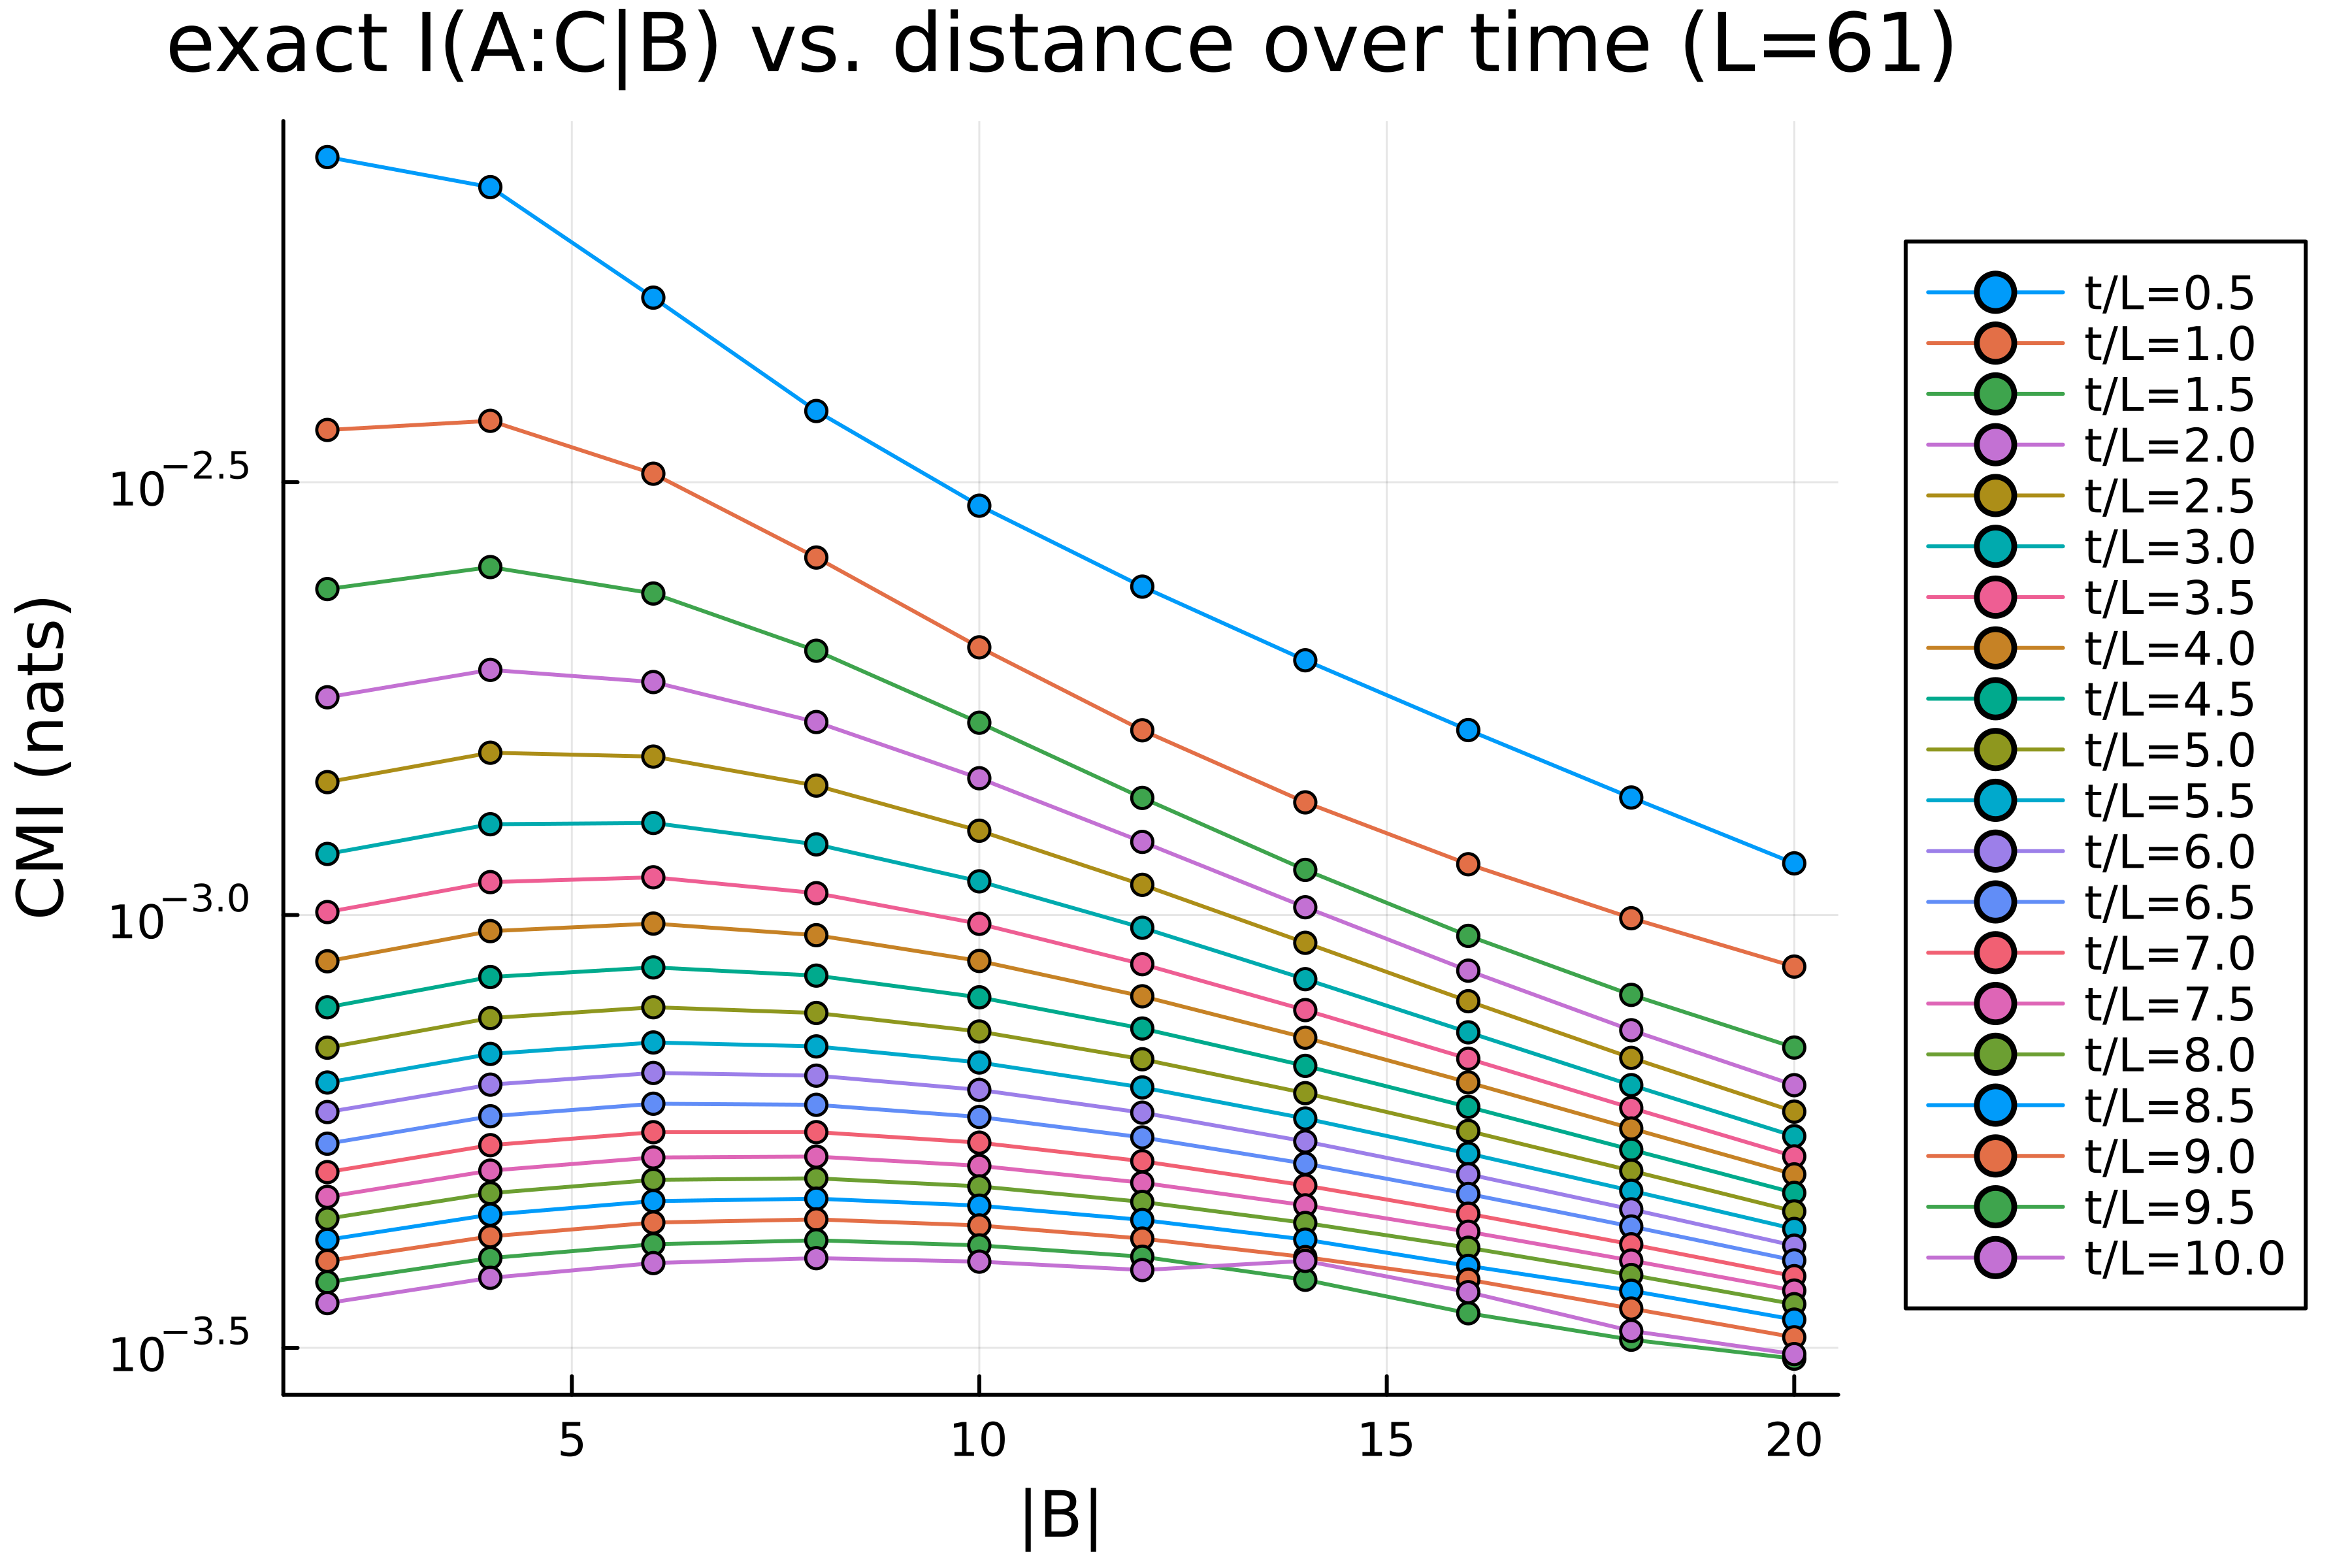

In [376]:
plt = plot()
L = 61
T = 10L
rs = 1:10

for t in 0.5:0.5:10.0
    xs = rs
    ys = [full_data[(L,T,γ,λ,r)][:exact_CMI_corr][1+2Int(round(t*L))] for r in rs]

    plt = plot!(plt, 2xs, ys, label="t/L=$t", m=3, yscale=:log10, legend=:outerright)
end

plot!(plt, xlabel="|B|", ylabel="CMI (nats)", title="exact I(A:C|B) vs. distance over time (L=61)", dpi=600)

savefig(plt, "../figs/25_09_24/CMI_late_times.png")

plt



# plt

In [271]:
L = 41
T = 10L
t = 1.5
[full_data[(L,T,γ,λ,r)][:exact_CMI_corr][Int(round(t*L))] for r in 1:2:9]

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [105]:
vector_CMI(to_vector(ψ.mps), 14)

SAB 8.768305288262457 + 0.0im SBC 8.768307668234055 + 0.0im SB 8.402372722190858 + 0.0im SABC 8.768312456118721 + 0.0im


0.3659277781869328 + 0.0im

In [112]:
exact_CMI(ψ, 6, 10)

SAB 2.747206692646757 + 0.0im SBC 2.7470146298902263 + 0.0im SB 2.0650314677892965 + 0.0im SABC 3.425228224121552 + 0.0im


0.003961630626134749 + 0.0im

In [116]:
reduced(to_vector(ψ.mps), [8])

2-element Vector{ComplexF64}:
  0.467034780737715 + 0.0im
 0.5329652192622885 + 0.0im

In [117]:
reduced(to_vector(ψ.mps), [9])

2-element Vector{ComplexF64}:
 0.4666694484454142 + 0.0im
 0.5333305515545872 + 0.0im

In [118]:
reduced(to_vector(ψ.mps), [8,9])

4-element Vector{ComplexF64}:
   0.200357194564555 + 0.0im
 0.26667758617316095 + 0.0im
   0.266312253880861 + 0.0im
 0.26665296538142585 + 0.0im

In [125]:
a = 4
b = 10
entropy(reduced(to_vector(ψ.mps), [a])) + entropy(reduced(to_vector(ψ.mps), [b])) - entropy(reduced(to_vector(ψ.mps), [a,b]))

0.002354653353480396 + 0.0im

In [98]:
i = 1
j = 15
ρABC = reduced(ψ, i, j)
ρAB = reduced(ρABC, 1:j-i)
ρBC = reduced(ρABC, 2:j-i+1)
ρB = reduced(ρABC, 2:j-i)



8192-element Vector{ComplexF64}:
  -4.199883020382375e-11 + 0.0im
  -7.090551497269502e-11 + 0.0im
  -8.214988812381318e-11 + 0.0im
 -2.2287234857123033e-11 + 0.0im
  -9.548177938270815e-11 + 0.0im
  -2.987262787535419e-11 + 0.0im
  -3.623427392991375e-11 + 0.0im
 -2.3668432934541627e-10 + 0.0im
  -1.159011510563553e-10 + 0.0im
 -4.1539254938209255e-11 + 0.0im
                         ⋮
 -2.2356138269060273e-11 + 0.0im
   9.253509167486312e-10 + 0.0im
   3.481766596983951e-10 + 0.0im
  3.9333920006692373e-10 + 0.0im
 -2.8399214602586325e-11 + 0.0im
   4.468347358543494e-10 + 0.0im
 -3.2455694645701774e-11 + 0.0im
  -3.592730126941627e-11 + 0.0im
 -1.5906555734130952e-10 + 0.0im

In [99]:
sum(to_vector(ψ.mps))

1.0000000000000009 + 0.0im

In [100]:
sum(reduced(ψ, 1, 15))

1.0000000000000009 + 0.0im

In [93]:
ITensor(1)

ITensor ord=0
NDTensors.Dense{Float64, Vector{Float64}}